<a href="https://colab.research.google.com/github/shreya-ganiga-datasci/Thyroid-detection-using-random-forest/blob/main/Thyroid_detection_using_random_forest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

THYROID DETECTION USING RANDOM FOREST


In [28]:
#import pacakges
import pandas as pd
import numpy as np

In [29]:
#import dataset

from google.colab import files
uploaded = files.upload()

Saving hypothyroidx.csv to hypothyroidx (1).csv


In [4]:
df = pd.read_csv('hypothyroidx.csv')

In [5]:
import pandas as pd
df= pd.read_csv('hypothyroidx.csv')
df

,class,Age,Sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,...,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
0,hypothyroid,72,M,f,f,f,f,f,f,f,...,y,0.6,y,15,y,1.48,y,10,n,?
1,hypothyroid,15,F,t,f,f,f,f,f,f,...,y,1.7,y,19,y,1.13,y,17,n,?
2,hypothyroid,24,M,f,f,f,f,f,f,f,...,y,0.2,y,4,y,1,y,0,n,?
3,hypothyroid,24,F,f,f,f,f,f,f,f,...,y,0.4,y,6,y,1.04,y,6,n,?
4,hypothyroid,77,M,f,f,f,f,f,f,f,...,y,1.2,y,57,y,1.28,y,44,n,?
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3158,negative,58,F,f,f,f,f,f,f,f,...,y,1.7,y,86,y,0.91,y,95,n,?
3159,negative,29,F,f,f,f,f,f,f,f,...,y,1.8,y,99,y,1.01,y,98,n,?
3160,negative,77,M,f,f,f,f,f,f,f,...,y,0.6,y,71,y,0.68,y,104,n,?
3161,negative,74,F,f,f,f,f,f,f,f,...,y,0.1,y,65,y,0.48,y,137,n,?


In [6]:
#different features

import pandas as pd
df=pd.read_csv('hypothyroidx.csv')
df.shape

(3163, 26)

In [7]:
df.values

array([['hypothyroid', '72', 'M', ..., '10', 'n', '?'],
       ['hypothyroid', '15', 'F', ..., '17', 'n', '?'],
       ['hypothyroid', '24', 'M', ..., '0', 'n', '?'],
       ...,
       ['negative', '77', 'M', ..., '104', 'n', '?'],
       ['negative', '74', 'F', ..., '137', 'n', '?'],
       ['negative', '56', 'F', ..., '143', 'n', '?']], dtype=object)

In [8]:
#data preparation

import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

file_handler = open("hypothyroidx.csv", "r")
df = pd.read_csv(file_handler, sep = ",")
file_handler.close()

In [9]:
df.loc[df['Age'] == '455', 'Age'] = '45'
df = df.replace(to_replace={'f':0,'t':1, 'y':1, 'n':0,'M':0,'F':1})
df = df.replace(to_replace={'?':True})
df = df.replace(to_replace={'hypothyroid':0,'negative':1})
df.dropna(inplace=True)
df.head(5)

,class,Age,Sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,...,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
0,0,72,0,0,0,0,0,0,0,0,...,1,0.6,1,15,1,1.48,1,10,0,True
1,0,15,1,1,0,0,0,0,0,0,...,1,1.7,1,19,1,1.13,1,17,0,True
2,0,24,0,0,0,0,0,0,0,0,...,1,0.2,1,4,1,1,1,0,0,True
3,0,24,1,0,0,0,0,0,0,0,...,1,0.4,1,6,1,1.04,1,6,0,True
4,0,77,0,0,0,0,0,0,0,0,...,1,1.2,1,57,1,1.28,1,44,0,True


In [10]:

df.describe()

,class,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,T3_measured,TT4_measured,T4U_measured,FTI_measured,TBG_measured
count,3163.000000,3163.000000,3163.000000,3163.000000,3163.000000,3163.000000,3163.000000,3163.000000,3163.000000,3163.000000,3163.000000,3163.000000,3163.000000,3163.000000,3163.000000,3163.000000,3163.000000,3163.000000
mean,0.952261,0.145748,0.017389,0.013279,0.032880,0.076193,0.076826,0.019918,0.031299,0.012646,0.000632,0.031299,0.852039,0.780272,0.921277,0.921593,0.921910,0.082200
std,0.213248,0.352909,0.130735,0.114483,0.178351,0.265349,0.266357,0.139740,0.174153,0.111760,0.025142,0.174153,0.355117,0.414128,0.269348,0.268853,0.268356,0.274713
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
75%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [11]:
from sklearn.preprocessing import LabelEncoder
lb_make = LabelEncoder()
df["class"] = lb_make.fit_transform(df["class"])

<Axes: xlabel='class', ylabel='count'>

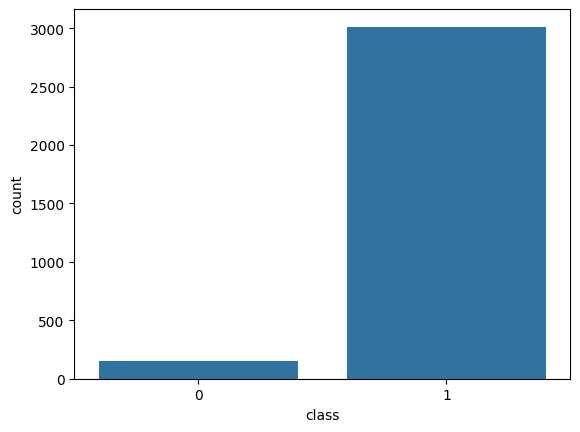

In [12]:
import seaborn as sns
sns.countplot(x="class",data=df)

In [13]:
x=df.iloc[:,[1,2,3,4,6,9,10,11,12,13,14,15,16,17,18,19]]
y=df["class"]

#model random forest regression

In [14]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.4,random_state=1)
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [15]:
print(x_train.shape)
print(df.shape)

(1897, 16)
(3163, 26)


In [16]:
x=df.iloc[:,[1,2,3,4,6,9,10,11,12,13,14,15,16,17,18,19]]
y=df["class"]

In [17]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=1)
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [18]:
print(x_train.shape)
print(df.shape)

(2214, 16)
(3163, 26)


In [19]:
from sklearn.ensemble import RandomForestClassifier
a=RandomForestClassifier()
a.fit(x_train,y_train)

RandomForestClassifier()

Check output

In [20]:

y_pred=a.predict(x_test)
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)*100


98.73551106427819

In [21]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred)

array([[ 33,  10],
       [  2, 904]])

In [22]:
from sklearn import metrics

confusion = metrics.confusion_matrix(y_test, y_pred)
print(confusion)

TP = confusion[1, 1]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]

accuracy = metrics.accuracy_score(y_test, y_pred)
precision = metrics.precision_score(y_test, y_pred)
recall = metrics.recall_score(y_test, y_pred)
f1_score = metrics.f1_score(y_test, y_pred)

print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)
print('F1 Score:', f1_score)


[[ 33  10]
 [  2 904]]
Accuracy: 0.9873551106427819
Precision: 0.9890590809628009
Recall: 0.9977924944812362
F1 Score: 0.9934065934065934


In [23]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression
a=LinearRegression()
a.fit(x_train,y_train)
print(type(x_test))


<class 'numpy.ndarray'>


In [24]:
x=df.iloc[:,[1,2,3,4,6,9,10,11,12,13,14,15,16,17,18,19]]
y=df["class"]

In [25]:

x_test=[29,0,1,0,0,0,0,0,0,0,1,1.3,1,1.1,1,83]
x_tests=np.array(x_test).reshape(1,-1)
y_pred=a.predict(x_tests)
if y_pred[0] < 2 :
    print("Patient has Thyroid")
else:
    print("No Thyroid")

No Thyroid


In [26]:
x_test=[72,0.6,0,0,0,0,0,0,0,0,1,30,1,0.6,1,15]

x_tests=np.array(x_test).reshape(1,-1)
y_pred=a.predict(x_tests)
if y_pred[0] < 2 :
    print("Patient has Thyroid")
else:
    print("No Thyroid")

Patient has Thyroid


In [27]:
x_test=[50,1,1,0,1,0,0,0,0,0,1,61,0,True,1,13]
x_tests=np.array(x_test).reshape(1,-1)
y_pred=a.predict(x_tests)
if y_pred[0] < 2 :
    print("Patient has Thyroid")
else:
    print("No Thyroid")

Patient has Thyroid
